Following packages have been used:

In [1]:
import pandas as pd
import numpy as np
from entropy import higuchi_fd
from hurst import compute_Hc
from entropy import detrended_fluctuation
from entropy import katz_fd
from entropy import app_entropy
import matplotlib.pyplot as plt
%matplotlib inline

Reading from the dataset and putting it in a pandas dataframe

In [2]:
data = pd.read_csv('C:\\Users\\Azaghast\\Downloads\\intern_dataset.csv')

In [3]:
data.head()

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A


Converting the 'Time' column's type to datetime

In [4]:
data['Time'] = pd.to_datetime(data['Time'])

In [5]:
data.describe()

,Signal1,Signal2
count,912000.000000,912000.000000
mean,31315.380483,0.398004
std,11700.734813,0.258119
min,-2934.328327,0.113841
25%,23851.958837,0.162522
50%,30650.812455,0.261210
75%,37933.966586,0.546605
max,67692.652022,1.356019


Separating the classes:

The sep() function separates the classes and returns their respective time,signal 1, and signal 2 data

In [6]:
plt.rcParams["figure.figsize"] = (20,10)

class_a = data.loc[data['Label']=='A']
class_b = data.loc[data['Label']=='B']
class_c = data.loc[data['Label']=='C']

def sep(n):
    time = n['Time']
    signal1 = n.iloc[:,1]
    signal2 = n.iloc[:,2]
    return time,signal1,signal2

In [7]:
a_time,a_sig1,a_sig2 = sep(class_a)
b_time,b_sig1,b_sig2 = sep(class_b)
c_time,c_sig1,c_sig2 = sep(class_c)

The following functions have been used in the analysis:

'calc_instances_in_minute()': calculates the number of elements that a signal data contains in roughly one minute

'calc_hurst_entropy_dfa()': calculates the hurst exponent, approximate entropy; plot the rescaled range analysis applied to given signal data; and computes the scaled exponent (i.e., generalized Hurst exponent) using detrended fluctuation analysis of the given signal data

'plot_kmax()': this function was used to determine a good value for the k-max parameter to be used while computing the Higuchi Fractal Dimension

'class_pipeline()': merges the above methods together to provide visual clarity regarding the graphs and the self-similarity and entropy measures 

In [8]:
def calc_instances_in_minute(time):
    base_sec = time[time.index[0]].second
    base_min = time[time.index[0]].minute
    ctr = 1
    for i in range(1,len(time)):
        currsec = time[time.index[i]].second
        currmin = time[time.index[i]].minute
        if currmin != base_min:
            if currmin > base_min and currsec == base_sec:
                break
            else:
                ctr+=1
    return ctr

def calc_hurst_entropy_dfa(num,signal):
    H,c,val = compute_Hc(signal)
    df = detrended_fluctuation(signal)
    entropy = app_entropy(signal)
    axes = plt.subplots()[1]
    if num=='1':
        axes.set_title('Signal 1 Rescaled Range vs Time Interval')
    elif num=='2':
        axes.set_title('Signal 2 Rescaled Range vs Time Interval')
    axes.plot(val[0], c*val[0]**H, color="blue")
    axes.scatter(val[0], val[1], color="red")
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel('Time interval')
    axes.set_ylabel('R/S ratio')
    axes.grid(True)
    plt.show()
    if num=='1':
        temp = 'Signal 1'
    elif num=='2':
        temp = 'Signal 2'
    print(temp,'Hurst Exponent =',H)
    print(temp,'Approximate Entropy =',entropy)
    print(temp,'Generalized Hurst Exponent (Detrended Fluctuation Analysis) =',df)
    return H,c,val,entropy,df

def plot_kmax(signal,minbound,maxbound):
    hfd = []
    x = [i for i in range(minbound,maxbound,100)]
    for i in range(minbound,maxbound,100):
        hfd.append(higuchi_fd(signal,i))
    plt.plot(x,hfd)

def class_pipeline(n):
    fig, axs = plt.subplots(2)
    n_time,n_sig1,n_sig2 = sep(n)
    num_instances = calc_instances_in_minute(n_time)
    axs[0].set_title('Plot of Signal 1 wrt Time (for a duration of ~1 minute)')
    axs[0].plot(n_time[:num_instances],n_sig1[:num_instances])
    axs[1].set_title('Plot of Signal 2 wrt Time (for a duration of ~1 minute)')
    axs[1].plot(n_time[:num_instances],n_sig2[:num_instances])
    n_sig1_H,n_sig1_c,n_sig1_val,n_sig1_entropy,n_sig1_df = calc_hurst_entropy_dfa('1',n_sig1)
    n_sig2_H,n_sig2_c,n_sig2_val,n_sig2_entropy,n_sig2_df = calc_hurst_entropy_dfa('2',n_sig2)
    return (num_instances,{'sig1':(n_sig1_H,n_sig1_c,n_sig1_val,n_sig1_entropy,n_sig1_df),'sig2':(n_sig2_H,n_sig2_c,n_sig2_val,n_sig2_entropy,n_sig2_df)})

In the following analyses, I have referred the paper 'Use of the Higuchi’s fractal dimension for the analysis of MEG
recordings from Alzheimer’s disease patients' by Gomez et al for determining a good value of k for the Higuchi Fractal Dimension calculation. 
The paper recommends to plot HFD (higuchi fractal dimension) versus k for a range of k and then select an approximate value of k for which the HFD plateaus out

Analysis of Class A:

Class A:



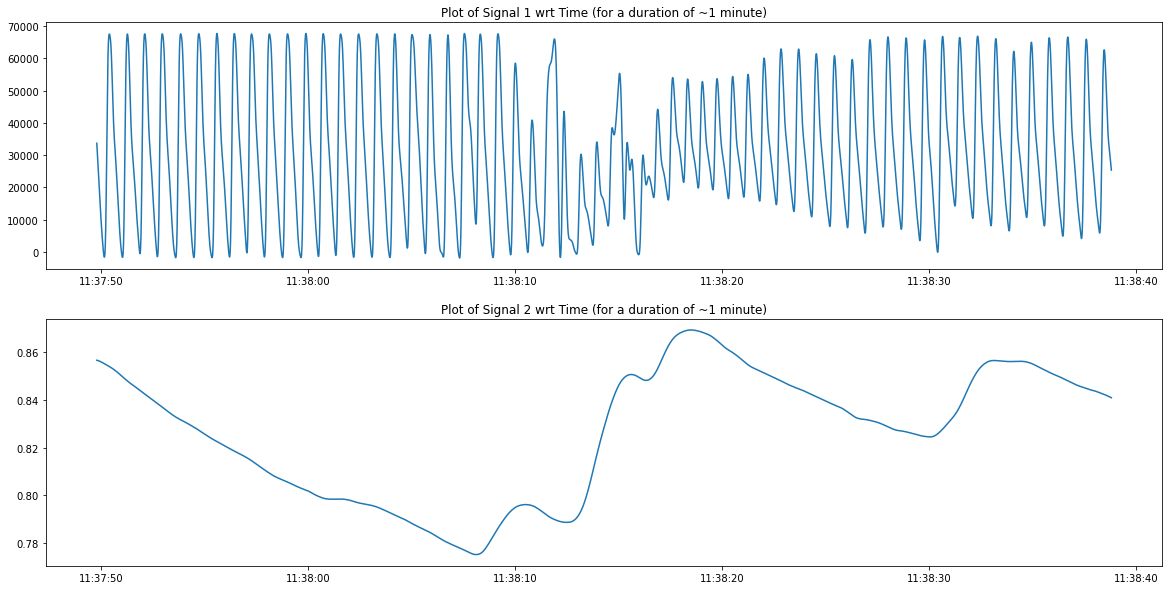

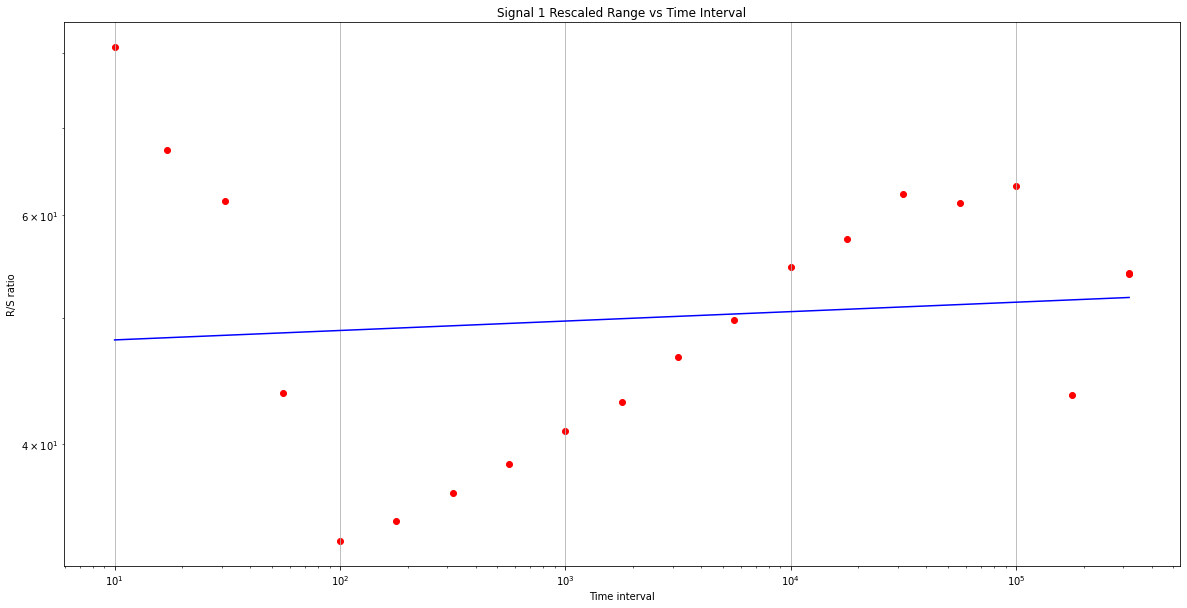

Signal 1 Hurst Exponent = 0.007246388937073967
Signal 1 Approximate Entropy = 0.28566703287662687
Signal 1 Generalized Hurst Exponent (Detrended Fluctuation Analysis) = 0.7269006170103044


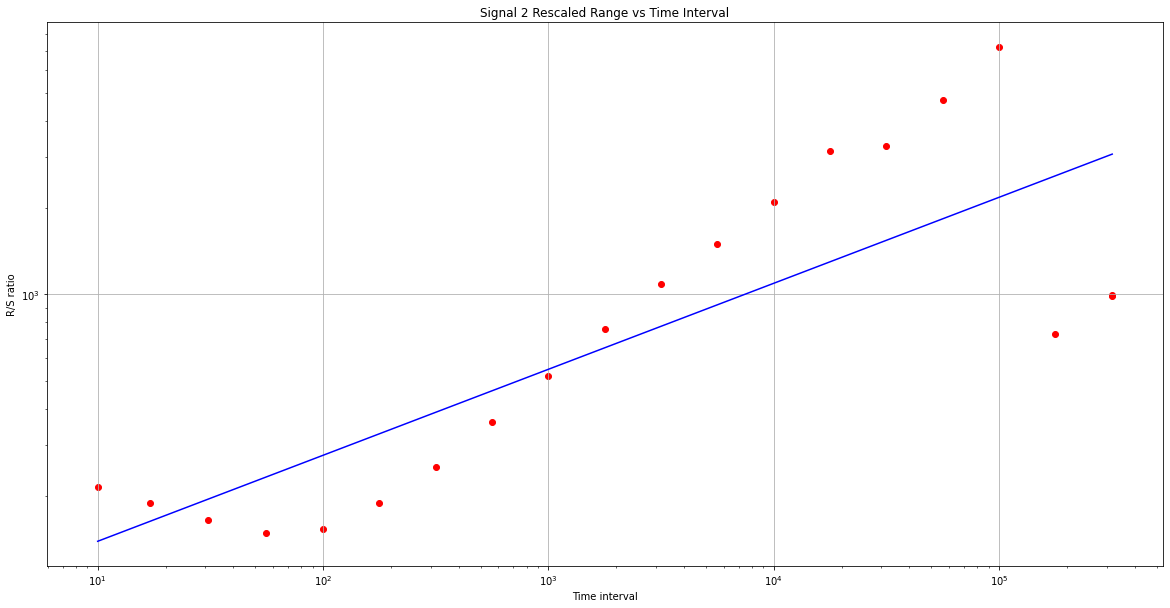

Signal 2 Hurst Exponent = 0.29820429992587977
Signal 2 Approximate Entropy = 0.00011288918481411336
Signal 2 Generalized Hurst Exponent (Detrended Fluctuation Analysis) = 1.7107904321186764


In [9]:
print('Class A:\n')
num,a_dict = class_pipeline(class_a) #wavelength (in terms of elements) ~(175/2)

In [10]:
print('Class A-Signal 1 Higuchi FD = ',higuchi_fd(a_sig1,24000),' Class A-Signal 1 Katz FD = ',katz_fd(a_sig1))#sig1 kmax ~24000
print('Class A-Signal 2 Higuchi FD = ',higuchi_fd(a_sig2,8000),' Class A-Signal 2 Katz FD = ',katz_fd(a_sig2))#sig2 kmax ~8000

Class A-Signal 1 Higuchi FD =  1.998300740189479  Class A-Signal 1 Katz FD =  3.4139001750107423
Class A-Signal 2 Higuchi FD =  1.25970205310294  Class A-Signal 2 Katz FD =  1.1241749063153963


Analysis of Class B:

Class B:



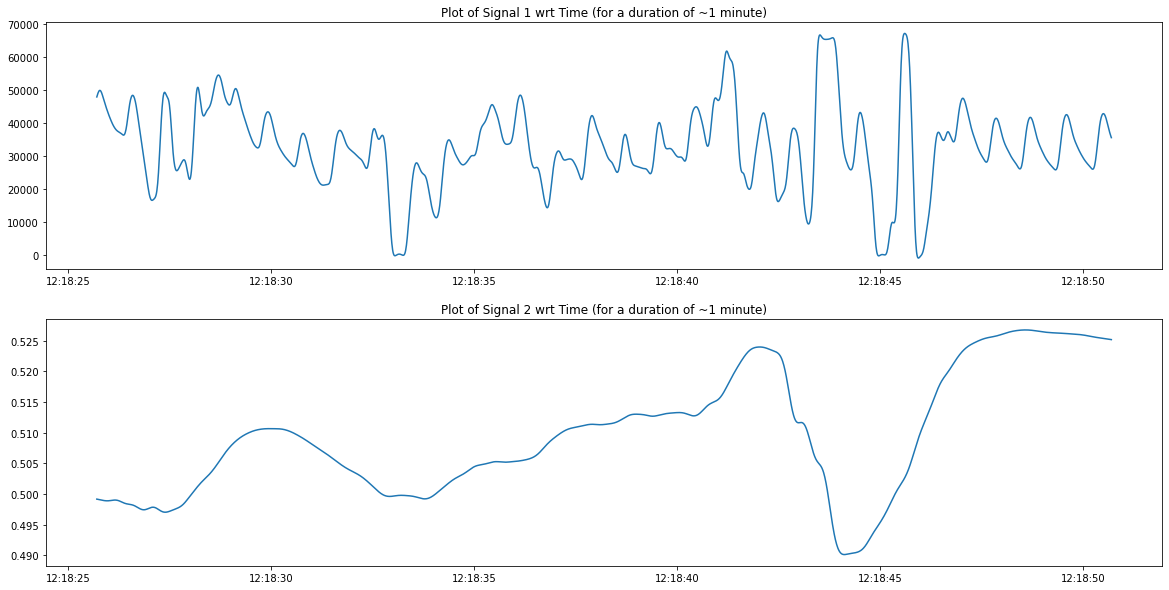

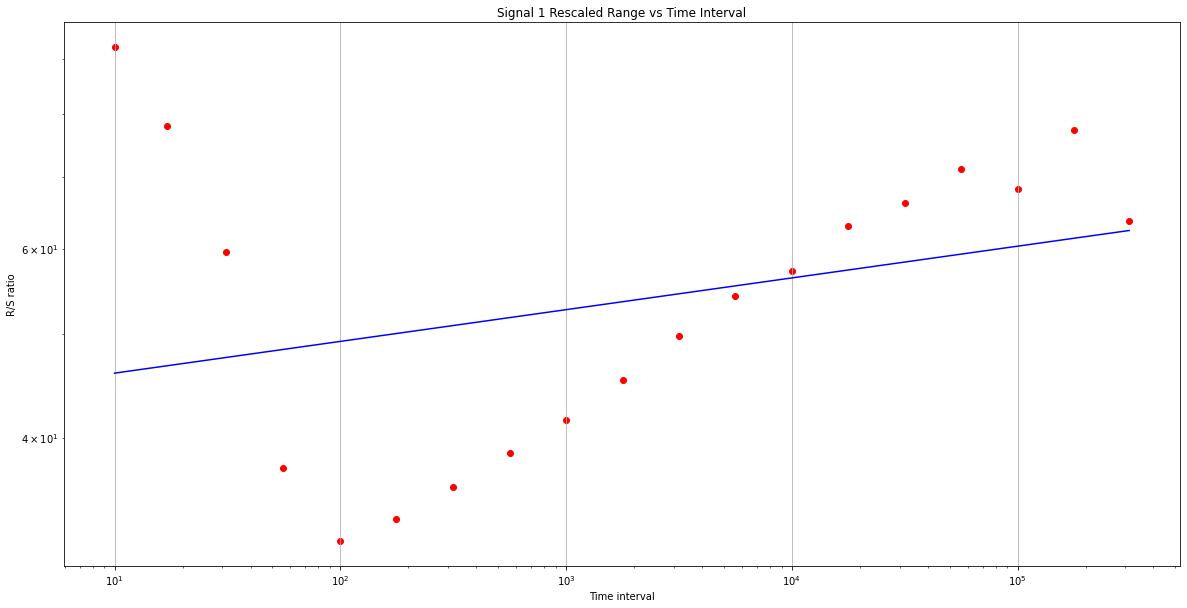

Signal 1 Hurst Exponent = 0.029550640035150077
Signal 1 Approximate Entropy = 0.34839418110953524
Signal 1 Generalized Hurst Exponent (Detrended Fluctuation Analysis) = 0.7411490174732348


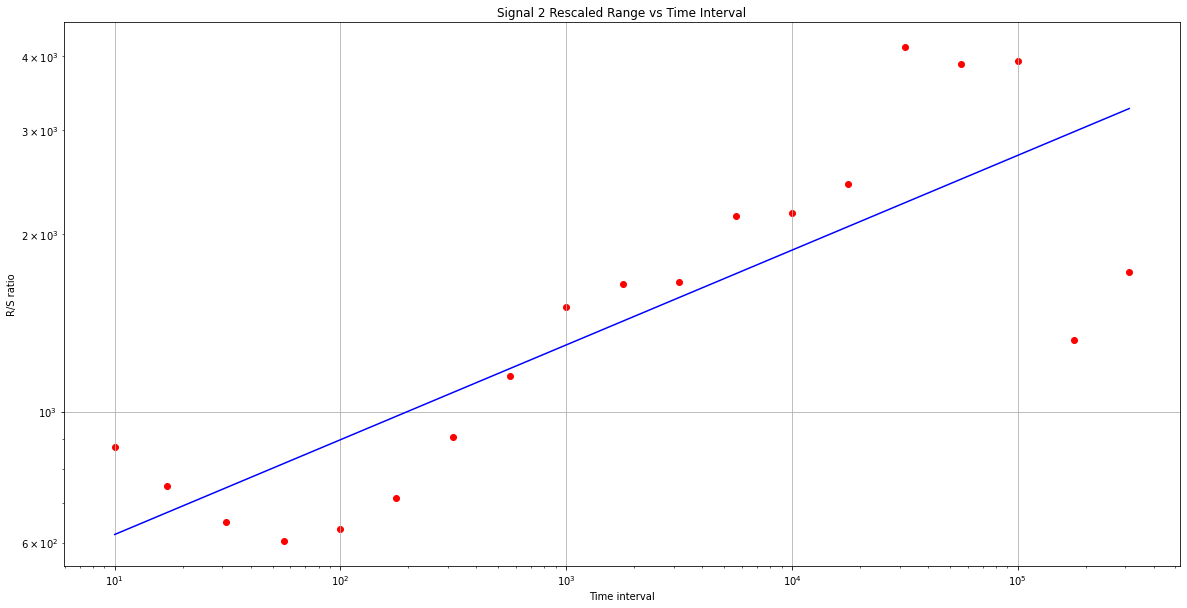

Signal 2 Hurst Exponent = 0.16049657772073747
Signal 2 Approximate Entropy = 0.0008917483339825338
Signal 2 Generalized Hurst Exponent (Detrended Fluctuation Analysis) = 1.7163832109997677


In [11]:
print('Class B:\n')
num_b,b_dict = class_pipeline(class_b)

In [12]:
print('Class B-Signal 1 Higuchi FD = ',higuchi_fd(b_sig1,20000),' Class B-Signal 1 Katz FD = ',katz_fd(b_sig1))#sig1 kmax ~20000 for now (lack of computation power)
print('Class B-Signal 2 Higuchi FD = ',higuchi_fd(b_sig2,29000),' Class B-Signal 2 Katz FD = ',katz_fd(b_sig2))#sig2 kmax ~29000 for now (lack of computation power)

Class B-Signal 1 Higuchi FD =  2.0099965402390856  Class B-Signal 1 Katz FD =  3.087957152732185
Class B-Signal 2 Higuchi FD =  1.5011966384757318  Class B-Signal 2 Katz FD =  1.3198216840536543


Analysis of Class C:

Class C:



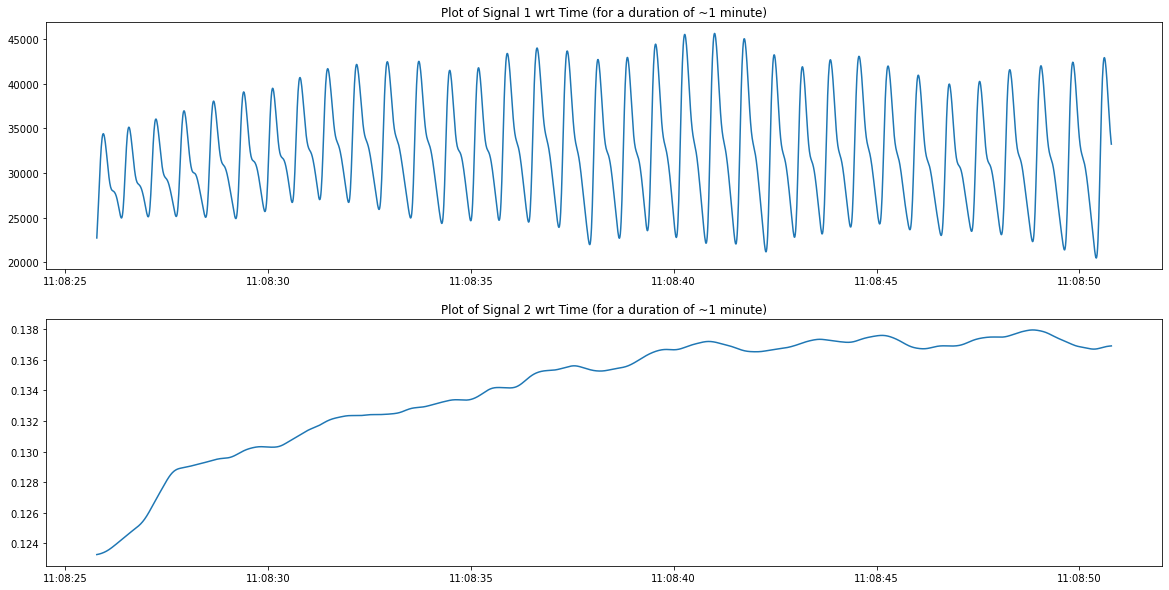

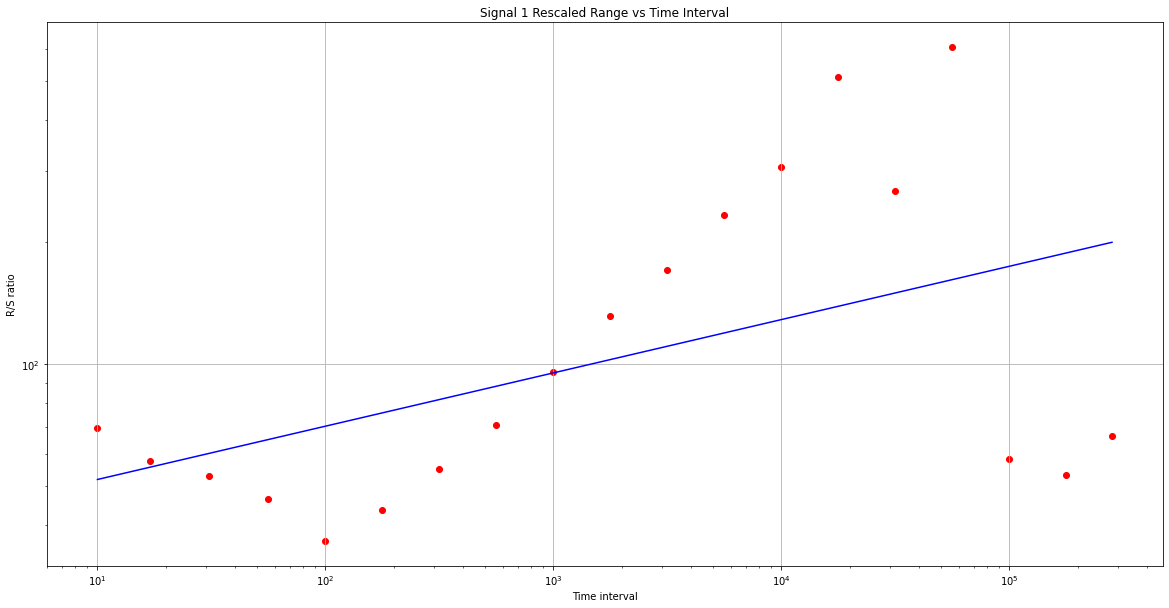

Signal 1 Hurst Exponent = 0.13150856195816135
Signal 1 Approximate Entropy = 0.27430878278423476
Signal 1 Generalized Hurst Exponent (Detrended Fluctuation Analysis) = 0.7994954597239021


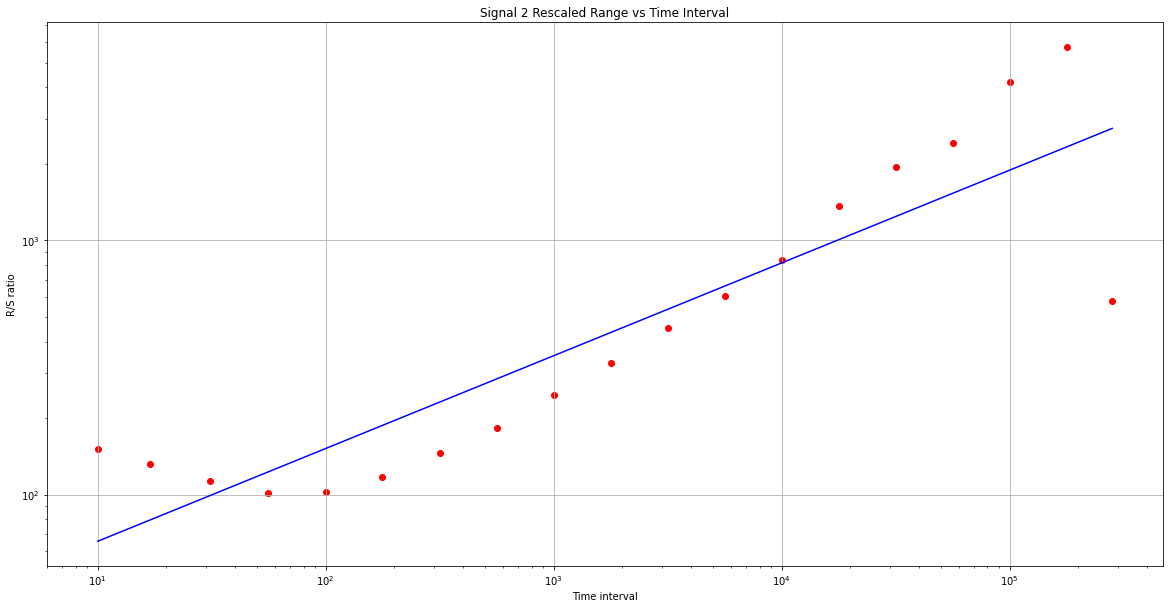

Signal 2 Hurst Exponent = 0.36472637994907464
Signal 2 Approximate Entropy = 0.0014159765394878843
Signal 2 Generalized Hurst Exponent (Detrended Fluctuation Analysis) = 1.6169161002271812


In [13]:
print('Class C:\n')
c_dict = class_pipeline(class_c)

In [14]:
print('Class C-Signal 1 Higuchi FD = ',higuchi_fd(c_sig1,4000),' Class C-Signal 1 Katz FD = ',katz_fd(c_sig1))#sig1 kmax ~4000
print('Class C-Signal 2 Higuchi FD = ',higuchi_fd(c_sig2,50000),' Class C-Signal 2 Katz FD = ',katz_fd(c_sig2))#sig2 kmax ~50000 for now (lack of computation power)

Class C-Signal 1 Higuchi FD =  1.9508256774786654  Class C-Signal 1 Katz FD =  2.8661331404575896
Class C-Signal 2 Higuchi FD =  1.5513765796008616  Class C-Signal 2 Katz FD =  1.2555800741222392


As we can see from the above analyses:

1) Class A:
    Hurst exponents of ~0.007 and ~0.298 for signals 1 and 2 respectively. Therefore, both of the 2 signals display 
    volatility and overall roughness.
    
    Approximate Entropy values of ~0.285 and ~0.0001 for signals 1 and 2 respectively. Therefore, signal 2 is strongly regular     and predictable while signal 1 is much less regular.
    
    Scaling Exponent/Generalized Hurst Exponent values of ~0.726 and ~1.710 respectively. Signal 1 is self-correlated and 
    signal 2 is non-stationary and unbounded.
    
    Higuchi Fractal Dimensions of ~1.998 (k-max = 24000) and ~1.259 (k-max = 8000) for signals 1 and 2 respectively. 
    
    Katz Fractal Dimensions of ~3.413 and ~1.124 for signals 1 and 2 respectively.

2) Class B:
    Hurst exponents of ~0.029 and ~0.160 for signals 1 and 2 respectively. Therefore, both of the 2 signals display 
    volatility and overall roughness.
    
    Approximate Entropy values of ~0.348 and ~0.0008 for signals 1 and 2 respectively. Therefore, signal 2 is strongly regular     and predictable while signal 1 is much less regular.
    
    Scaling Exponent/Generalized Hurst Exponent values of ~0.741 and ~1.716 for signals 1 and 2 respectively. Signal 1 is self-     correlated and signal 2 is non-stationary and unbounded.
    
    Higuchi Fractal Dimensions of ~2.009 (k-max = 20000) and ~1.501 (k-max = 29000) for signals 1 and 2 respectively. 
    
    Katz Fractal Dimensions of ~3.087 and ~1.319 for signals 1 and 2 respectively.

3) Class C:
    Hurst exponents of ~0.131 and ~0.364 for signals 1 and 2 respectively. Though signal 1 is quite volatile and has a rougher     trend, signal 2 is comparatively less volatile than the other signals. 
    
    Approximate Entropy values of ~0.274 and ~0.001 for signals 1 and 2 respectively. Therefore, signal 2 is decently regular       and predictable while signal 1 is much less predictable.
    
    Scaling Exponent/Generalized Hurst Exponent values of ~0.799 and ~1.616 for signals 1 and 2 respectively. Signal 1 is 
    self-correlated and signal 2 resembles Brownian noise.
    
    Higuchi Fractal Dimensions of ~1.950 (k-max = 4000) and ~1.551 (k-max = 50000) for signals 1 and 2 respectively. 
    
    Katz Fractal Dimensions of ~2.866 and ~1.255 for signals 1 and 2 respectively.

Therefore, considering all the above measures,class B is the most complex class of the given three. It displays strong volatility, has a mix of predictable and unpredictable signals, and has a non-stationary and unbounded part. It also has the greatest combined Higuchi Fractal Dimension of ~3.600; and a comparatively large combined Katz Dimension of ~4.406.  